In [2]:
import pandas as pd
import numpy as np

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2024-10-01 22:12:41--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2024-10-01 22:12:41 (23.3 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(3)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [9]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [11]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [12]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [13]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

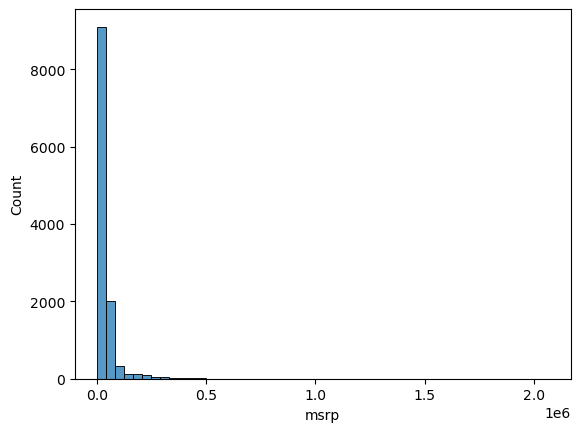

In [15]:
sns.histplot(df.msrp, bins=50)
plt.show()

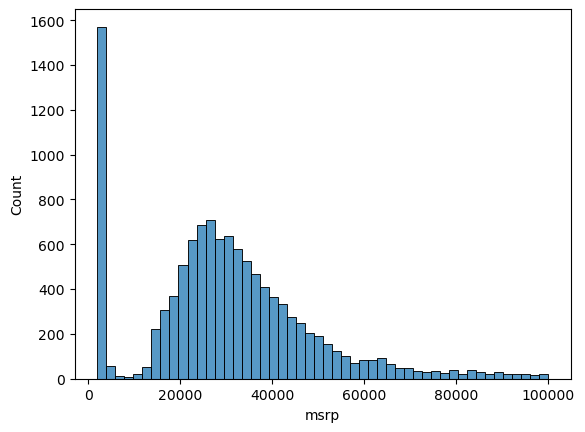

In [16]:
sns.histplot(df.msrp[df.msrp < 100_000], bins=50)
plt.show()

In [17]:
np.log([1, 10, 1000, 100_000]) #for normalizing of values

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [18]:
np.log([0, 1, 10, 1000, 100_000])

/tmp/ipykernel_531/118792344.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 1000, 100_000])


array([       -inf,  0.        ,  2.30258509,  6.90775528, 11.51292546])

In [19]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100_000 + 1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [20]:
np.log1p([0, 1, 10, 1000, 100_000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [21]:
price_logs = np.log1p(df.msrp)

In [22]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

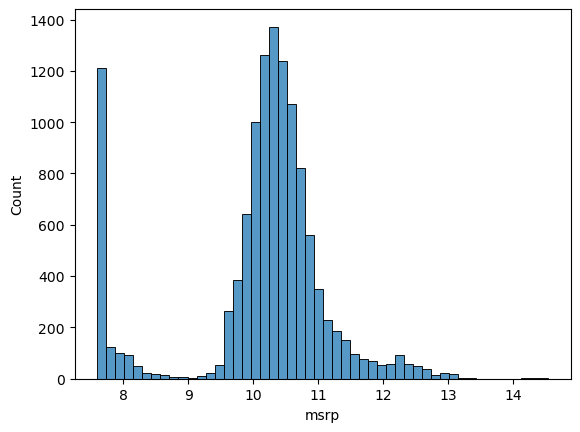

In [23]:
sns.histplot(price_logs, bins=50)
plt.show()

In [24]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [25]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test # since the total length does not equal to the original when using int(n * 0.6)

In [26]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [27]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [28]:
idx = np.arange(n)

In [29]:
np.random.seed(2)
np.random.shuffle(idx)

In [30]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [31]:
df_train.head()

make    model  year          engine_fuel_type  engine_hp  \
2735    chevrolet   cobalt  2008          regular_unleaded      148.0   
6720       toyota   matrix  2012          regular_unleaded      132.0   
5878       subaru  impreza  2016          regular_unleaded      148.0   
11190  volkswagen  vanagon  1991          regular_unleaded       90.0   
4554         ford    f-150  2017  flex-fuel_(unleaded/e85)      385.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
2735                4.0            manual  front_wheel_drive              2.0   
6720                4.0         automatic  front_wheel_drive              4.0   
5878                4.0         automatic    all_wheel_drive              4.0   
11190               4.0            manual   rear_wheel_drive              3.0   
4554                8.0         automatic   four_wheel_drive              4.0   

      market_category vehicle_size      vehicle_style  highway_mpg  city_mpg  \
2735              NaN      compact              coupe           33        24   
6720        hatchback      compact      4dr_hatchback           32        25   
5878        hatchback      compact      4dr_hatchback           37        28   
11190             NaN        large  passenger_minivan           18        16   
4554        flex_fuel        large    crew_cab_pickup           21        15   

       popularity   msrp  
2735         1385  14410  
6720         2031  19685  
5878          640  19795  
11190         873   2000  
4554         5657  56260

In [32]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [34]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [35]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Linear Regression

In [36]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [37]:
xi = [453, 11, 86] # Get engine_hp, city_mpg and popularity as a feature matrix
w0 = 7.17
w = [0.01, 0.04, 0.002]

# w0 = 0 # bias term
# w = [1, 1, 1]

In [38]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [39]:
linear_regression(xi)

12.312

In [40]:
np.exp(12.312) - 1 # we do -1 to undo the +1 we did inside log

222347.2221101062

In [41]:
np.expm1(12.312)

222347.2221101062

In [42]:
np.log1p(222347.2221101062)

12.312

Linear Regression in vector form

In [43]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [44]:
w_new = [w0] + w

In [45]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [47]:
linear_regression(xi)

12.312

In [48]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [49]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [50]:
def linear_regression(X):
    return X.dot(w_new)

In [51]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

Training a linear regression model

In [52]:
def train_linear_regression(X, y):
    pass

In [67]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [64]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
X = np.column_stack([ones, X])

In [68]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [57]:
XTX = X.T.dot(X) # Gram Matrix
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [58]:
w0 = w_full[0]
w = w_full[1:]

In [59]:
w0, w

(25844.754055766807, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [69]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [70]:
train_linear_regression(X, y)

(25844.754055766807, array([ -16.08906468, -199.47254894,   -1.22802883]))

Car price baseline model

In [72]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [73]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [75]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

df_train[base]

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0         148.0               4.0           33        24        1385
1         132.0               4.0           32        25        2031
2         148.0               4.0           37        28         640
3          90.0               4.0           18        16         873
4         385.0               8.0           21        15        5657
...         ...               ...          ...       ...         ...
7145      300.0               6.0           31        20        3916
7146      210.0               4.0           30        24         873
7147      285.0               6.0           22        17         549
7148      563.0              12.0           21        13          86
7149      200.0               4.0           31        22         873

[7150 rows x 5 columns]

In [77]:
df_train[base].values

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [79]:
X_train = df_train[base].values

In [81]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [82]:
df_train[base].fillna(0).isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [84]:
X_train = df_train[base].fillna(0).values

In [86]:
w0, w = train_linear_regression(X_train, y_train)

In [89]:
y_pred = w0 + X_train.dot(w)

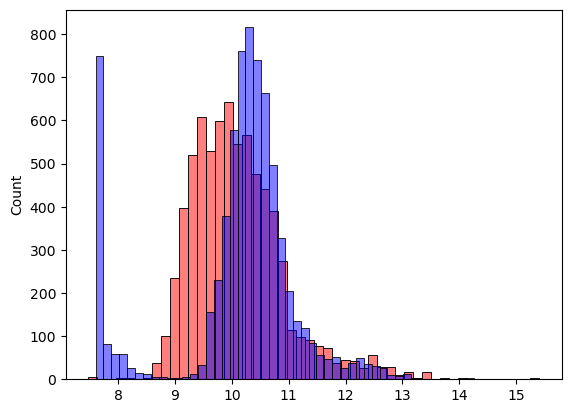

In [90]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
plt.show()

ROOT MEAN SQUARED ERROR

In [94]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [93]:
rmse(y_train, y_pred)

0.7554192603920132